# 讀取數據集

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set() #載入繪圖函式
from sklearn.metrics import precision_score, recall_score, f1_score # Import necessary metrics functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()
!unzip data.zip -d data

In [24]:
#讀取數據集
df_train = pd.read_csv('/content/data/train.csv')
df_train.head()

df_test = pd.read_csv('/content/data/test.csv')

In [25]:
#看每個資料的變數值
for i in df_train.columns:
  print(i)
  print(list(df_train[i].unique()))
  print('-------------------')



yyyy
[2014, 2015, 2016, 2017]
-------------------
PerNo
[1, 3, 6, 7, 10, 11, 14, 15, 16, 18, 19, 22, 23, 24, 26, 27, 28, 31, 35, 39, 40, 42, 44, 45, 51, 54, 55, 56, 57, 58, 59, 61, 62, 65, 68, 69, 70, 71, 72, 73, 78, 80, 85, 87, 89, 96, 98, 100, 102, 105, 107, 111, 112, 116, 118, 120, 121, 123, 125, 126, 133, 135, 138, 140, 142, 143, 144, 145, 146, 150, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163, 165, 167, 169, 170, 171, 173, 176, 177, 178, 180, 183, 186, 190, 194, 195, 197, 199, 203, 204, 206, 209, 210, 212, 214, 215, 220, 227, 228, 229, 230, 232, 233, 234, 235, 241, 244, 245, 249, 252, 259, 260, 262, 266, 269, 271, 272, 273, 274, 275, 276, 279, 281, 282, 283, 284, 285, 287, 289, 290, 291, 292, 294, 296, 297, 301, 302, 303, 305, 306, 308, 309, 311, 312, 313, 314, 318, 321, 322, 325, 327, 332, 333, 338, 339, 343, 344, 345, 346, 349, 350, 351, 352, 353, 354, 355, 358, 359, 361, 364, 365, 366, 368, 369, 370, 371, 372, 373, 375, 376, 377, 378, 379, 380, 382, 384, 385, 386, 389, 390,

In [26]:
#查看NA值
train_na_sum = df_train.isna().sum()
print(train_na_sum)
print('----------------------')
test_na_sum = df_test.isna().sum()
print(test_na_sum)
print('----------------------')

yyyy            0
PerNo           0
PerStatus       0
sex            73
工作分類           73
職等             73
廠區代碼           73
管理層級           73
工作資歷1          73
工作資歷2          73
工作資歷3          73
工作資歷4          73
工作資歷5          73
專案時數           73
專案總數           73
當前專案角色         73
特殊專案佔比         73
工作地點           73
訓練時數A          73
訓練時數B          73
訓練時數C          73
生產總額           73
榮譽數            73
是否升遷           73
升遷速度           73
近三月請假數A        73
近一年請假數A        73
近三月請假數B        73
近一年請假數B        73
出差數A           73
出差數B           73
出差集中度          73
年度績效等級A        73
年度績效等級B        73
年度績效等級C        73
年齡層級           73
婚姻狀況           73
年資層級A          73
年資層級B          73
年資層級C          73
任職前工作平均年數      73
最高學歷         5326
畢業學校類別       3841
畢業科系類別         73
眷屬量            73
通勤成本           73
歸屬部門           73
dtype: int64
----------------------
yyyy            0
PerNo           0
PerStatus    3739
sex            18
工作分類           18
職等             18
廠區代碼      

In [27]:

#針對刪除最高學歷＆畢業學校類別並對其他缺失值進行補-1（找一個大家都沒沒有的代號）
df_train = df_train.drop(['最高學歷','畢業學校類別'], axis=1)
#對缺失值做中位數填補
for i in df_train.columns:
  df_train[i] = df_train[i].fillna(df_train[i].median())

df_test = df_test.drop(['最高學歷','畢業學校類別','PerStatus'], axis=1)
for i in df_test.columns:
  df_test[i] = df_test[i].fillna(df_test[i].median())

In [28]:
#查看有幾個年份
print(df_train['yyyy'].unique())
m=0 # 計算刪除的員工數量
n=0 # 計算保留的員工數量

for i in df_train['PerNo'].unique():
    df = df_train[df_train["PerNo"] == i ]
    df_last = df.iloc[-1] # 獲取最後一筆資料
    # 判斷是否需要刪除(刪除2016年沒離職但2017年卻就沒有資料的員工)
    if df_last["yyyy"] != 2017 and df_last.PerStatus == 0.0:
        df_train = df_train[~df_train["PerNo"].isin([i])]   # 刪除該員工的所有資料
        n =n+ 1
    else:
      m = m+1


print("留下員編數:" , m , "刪除員編數:" ,n)


[2014 2015 2016 2017]
留下員編數: 4295 刪除員編數: 305


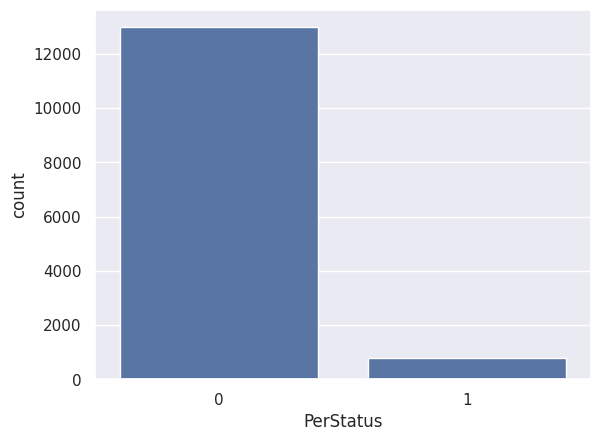

In [8]:
#圖表化離職和上尚未離職的比例
ax = sns.countplot(x='PerStatus', data =df_train)

In [29]:
#離職和尚未離職比例太過懸殊，調整隨機挑選尚未離職的資料796筆讓資料平衡，總共1592筆
df = df_train.sample(frac=1) #打亂資料順序
quit_df = df.loc[df['PerStatus'] ==1] #篩選離職員工資料
non_quit_df = df.loc[df['PerStatus'] == 0][:796]
normal_distributed_df = pd.concat([quit_df, non_quit_df])
new_df = normal_distributed_df.sample(frac=1, random_state=32)

In [30]:
label = new_df.loc[:,'PerStatus']
label.value_counts()
new_df_no_label = new_df.drop(columns=['PerStatus'])

In [31]:
X_train , X_test , y_train, y_test = train_test_split(new_df_no_label, label, test_size=0.2, random_state=2)

In [21]:
no_label = df_train.drop(columns=['PerStatus'])
label = df_train['PerStatus']
X_train , X_test , y_train, y_test = train_test_split(no_label, label, test_size=0.2, random_state=2)

# 訓練decision tree模型

[0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1]
----------------
精確度： 0.5531914893617021
召回： 0.4936708860759494
F1 分數: 0.5217391304347827


<Axes: >

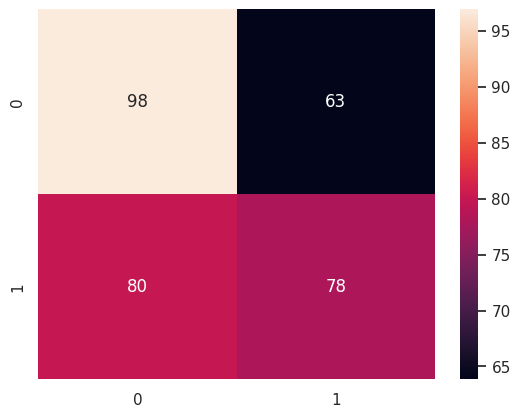

In [32]:
#導入決策樹模型
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)


#測試集的預測結果
y_pred = tree.predict(X_test)
print(y_pred)

#印出混淆矩陣


print('----------------')
print('精確度：',precision_score(y_test, y_pred,average='binary'))
print( '召回：',recall_score(y_test, y_pred,average='binary'))
print('F1 分數:',f1_score(y_test, y_pred,average='binary'))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True)

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit


params = {
    'max_depth': [int(x) for x in np.linspace(start = 3, stop=25, num=2)],
    'min_samples_leaf': [int(x) for x in np.linspace(start=5, stop=25, num=2)],
    'splitter':['best','ramdom']

}



grid_dec = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=params, verbose=1, scoring = "f1")
grid_dec.fit(X_train,y_train)
grid_dec_hrs = HalvingRandomSearchCV(estimator=tree, param_distributions=params, verbose=1,scoring ="f1")
grid_dec_hrs.fit(X_train,y_train)





Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1273
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 20
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

----------
iter: 1
n_candidates: 3
n_resources: 60
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.49333333        nan 0.28              nan 0.49333333        nan
 0.28              nan 0.         0.35734266 0.39623155]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the train scores are non-finite: [0.81169001        nan 0.3               nan 0.81169001        nan
 0.3               nan 0.         0.8034706  0.82689357]
  warnings.warn(


HalvingRandomSearchCV(estimator=DecisionTreeClassifier(),
                      param_distributions={'max_depth': [3, 25],
                                           'min_samples_leaf': [5, 25],
                                           'splitter': ['best', 'ramdom']},
                      scoring='f1', verbose=1)

In [34]:
print(grid_dec.best_score_)
print(grid_dec.best_params_)
print(grid_dec.best_estimator_)
print('-----------------------')
print(grid_dec_hrs.best_score_)
print(grid_dec_hrs.best_params_)
print(grid_dec_hrs.best_estimator_)

0.6084404284645468
{'max_depth': 3, 'min_samples_leaf': 25, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3, min_samples_leaf=25)
-----------------------
0.39623154623154616
{'splitter': 'best', 'min_samples_leaf': 5, 'max_depth': 25}
DecisionTreeClassifier(max_depth=25, min_samples_leaf=5)


In [35]:
grid_dec.best_estimator_.fit(X_train,y_train)
print(grid_dec.best_estimator_.score(X_test,y_test))
y_pred = grid_dec.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
grid_dec_hrs.best_estimator_.fit(X_train,y_train)
print(grid_dec_hrs.best_estimator_.score(X_test,y_test))
y_pred_hrs = grid_dec_hrs.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))

0.5799373040752351
[[103  58]
 [ 76  82]]
----------------
精確度： 0.5857142857142857
召回： 0.5189873417721519
F1 分數: 0.5503355704697986
0.5862068965517241
[[103  58]
 [ 76  82]]
----------------
精確度： 0.5857142857142857
召回： 0.5189873417721519
F1 分數: 0.5503355704697986


In [88]:
##將預測結果寫成程目標的格式
pred_test_dt = grid_dec.predict(df_test)
pred_test_dt= pd.DataFrame(pred_test_dt)
submit_dt = df_test['PerNo']
submit_dt = pd.DataFrame(submit_dt)
submit_dt = pd.concat([submit_dt, pred_test_dt], axis=1)
submit_dt.columns = ['PerNo', 'PerStatus']
print(submit_dt)



      PerNo  PerStatus
0         1          0
1         3          0
2         7          1
3        15          0
4        16          0
...     ...        ...
3734   8761          1
3735   8765          0
3736   8767          1
3737   8774          0
3738   8775          1

[3739 rows x 2 columns]


In [89]:
submit_dt.to_csv('/content/submit_dt_0827.csv', index=False)

# **訓練random forest tree**


[[109  52]
 [ 54 104]]
----------------
精確度： 0.6666666666666666
召回： 0.6582278481012658
F1 分數: 0.6624203821656052


<Axes: >

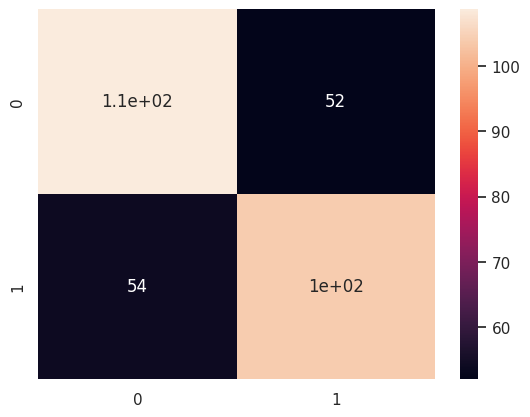

In [27]:
#建立模型做訓練
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True)

In [92]:
params = {
    'n_estimators': [int(x) for x in np.linspace(start = 3, stop=12, num=5)],
    'max_depth': [int(x) for x in np.linspace(start = 3, stop = 40, num = 4)],
    'min_samples_leaf': [int(x) for x in np.linspace(start=5, stop=50, num=5)],
    'bootstrap': [True, False]

}



grid_dec = GridSearchCV(estimator=rfc,
                           param_grid=params, verbose=1, scoring = "f1")
grid_dec.fit(X_train,y_train)
grid_dec_hrs = HalvingRandomSearchCV(estimator=rfc, param_distributions=params, verbose=1,scoring ="f1")
grid_dec_hrs.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1273
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 63
n_resources: 20
Fitting 5 folds for each of 63 candidates, totalling 315 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

----------
iter: 1
n_candidates: 21
n_resources: 60
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 7
n_resources: 180
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 540
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingRandomSearchCV(estimator=RandomForestClassifier(),
                      param_distributions={'bootstrap': [True, False],
                                           'max_depth': [3, 15, 27, 40],
                                           'min_samples_leaf': [5, 16, 27, 38,
                                                                50],
                                           'n_estimators': [3, 5, 7, 9, 12]},
                      scoring='f1', verbose=1)

In [93]:
print(grid_dec.best_score_)
print(grid_dec.best_params_)
print(grid_dec.best_estimator_)
print('-----------------------')
print(grid_dec_hrs.best_score_)
print(grid_dec_hrs.best_params_)
print(grid_dec_hrs.best_estimator_)

0.6543921214009191
{'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 16, 'n_estimators': 9}
RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=16,
                       n_estimators=9)
-----------------------
0.6417571017237594
{'n_estimators': 12, 'min_samples_leaf': 5, 'max_depth': 3, 'bootstrap': True}
RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=12)


In [94]:
grid_dec.best_estimator_.fit(X_train,y_train)
print(grid_dec.best_estimator_.score(X_test,y_test))
y_pred = grid_dec.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
grid_dec_hrs.best_estimator_.fit(X_train,y_train)
print(grid_dec_hrs.best_estimator_.score(X_test,y_test))
y_pred_hrs = grid_dec_hrs.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))

0.6363636363636364
[[102  59]
 [ 57 101]]
----------------
精確度： 0.63125
召回： 0.6392405063291139
F1 分數: 0.6352201257861635
0.6206896551724138
[[102  59]
 [ 57 101]]
----------------
精確度： 0.63125
召回： 0.6392405063291139
F1 分數: 0.6352201257861635


In [72]:
df_test = pd.read_csv('/content/data/test.csv')
df_test = df_test.drop(['最高學歷','畢業學校類別','PerStatus'], axis=1)
for i in df_test.columns:
  df_test[i] = df_test[i].fillna(df_test[i].median())

In [95]:

pred_test_rfc = grid_dec.predict(df_test)
pred_test_rfc= pd.DataFrame(pred_test_rfc)
submit_rfc = df_test['PerNo']
submit_rfc = pd.DataFrame(submit_rfc)
submit_rfc = pd.concat([submit_rfc, pred_test_rfc], axis=1)
submit_rfc.columns = ['PerNo', 'PerStatus']
print(submit_rfc)

submit_rfc.to_csv('/content/submit_rfc_0827.csv', index=False)

      PerNo  PerStatus
0         1          0
1         3          0
2         7          1
3        15          1
4        16          1
...     ...        ...
3734   8761          1
3735   8765          0
3736   8767          1
3737   8774          0
3738   8775          0

[3739 rows x 2 columns]


# 使用SVM預測

[[83 78]
 [72 86]]
----------------
精確度： 0.524390243902439
召回： 0.5443037974683544
F1 分數: 0.5341614906832298


<Axes: >

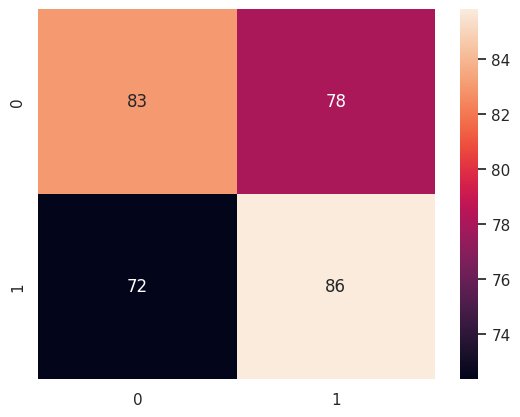

In [28]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma='scale', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True)

In [64]:
#使用Gridsearch函數，對模型進行參數調整

clf = SVC()
param_grid = {'C':[0.01,0.1,1,10,100], 'gamma': [0.001,0.01,0.1,1,10]}
grid_dec = GridSearchCV(estimator=clf,
                           param_grid=param_grid, verbose=1, scoring = "f1")
grid_dec.fit(X_train,y_train)
grid_dec_hrs = HalvingRandomSearchCV(estimator=clf, param_distributions=param_grid, verbose=1,scoring ="f1")
grid_dec_hrs.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1273
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 20
Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 25 is smaller than n_iter=63. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 9
n_resources: 60
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 180
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingRandomSearchCV(estimator=SVC(),
                      param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                           'gamma': [0.001, 0.01, 0.1, 1, 10]},
                      scoring='f1', verbose=1)

In [65]:
print(grid_dec.best_score_)
print(grid_dec.best_params_)
print(grid_dec.best_estimator_)
print('-----------------------')
print(grid_dec_hrs.best_score_)
print(grid_dec_hrs.best_params_)
print(grid_dec_hrs.best_estimator_)

0.6691755627160904
{'C': 1, 'gamma': 0.1}
SVC(C=1, gamma=0.1)
-----------------------
0.0
{'gamma': 10, 'C': 0.01}
SVC(C=0.01, gamma=10)


In [66]:
grid_dec.best_estimator_.fit(X_train,y_train)
print(grid_dec.best_estimator_.score(X_test,y_test))
y_pred = grid_dec.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
grid_dec_hrs.best_estimator_.fit(X_train,y_train)
print(grid_dec_hrs.best_estimator_.score(X_test,y_test))
y_pred_hrs = grid_dec_hrs.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))

0.4952978056426332
[[  5 156]
 [  5 153]]
----------------
精確度： 0.49514563106796117
召回： 0.9683544303797469
F1 分數: 0.6552462526766596
0.4952978056426332
[[  5 156]
 [  5 153]]
----------------
精確度： 0.49514563106796117
召回： 0.9683544303797469
F1 分數: 0.6552462526766596


# 建立Xgboost

[[105  56]
 [ 65  93]]
----------------
精確度： 0.6241610738255033
召回： 0.5886075949367089
F1 分數: 0.6058631921824104


<Axes: >

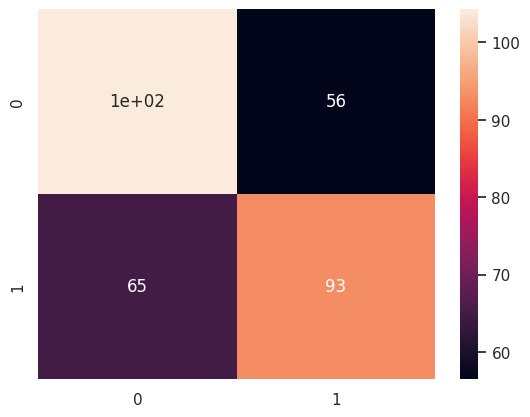

In [96]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(learning_rate=0.02, n_estimators=1000, nthread=6, eval_metric='auc')

xgbc_model = xgbc.fit(X_train.values, y_train.values)
y_pred = xgbc_model.predict(X_test.values)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True)

In [97]:
#對XGB使用GridSearchCV進行參數調整


params = {
    'n_estimators': [200],
    'max_depth': [int(x) for x in np.linspace(start = 3, stop = 5, num = 3)],
    'learning_rate': [int(x) for x in np.linspace(start=0.01, stop=0.2, num = 4)],
    'gamma': [0,1,5],
    'lambda': [0.01, 0.1, 1]

}



grid_dec = GridSearchCV(estimator=xgbc,
                           param_grid=params, verbose=1, scoring = "f1")
grid_dec.fit(X_train,y_train)
grid_dec_hrs = HalvingRandomSearchCV(estimator=xgbc, param_distributions=params, verbose=1,scoring ="f1")
grid_dec_hrs.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1273
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 63
n_resources: 20
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 1
n_candidates: 21
n_resources: 60
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 7
n_resources: 180
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 540
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingRandomSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='auc',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=1000, n_jobs=None,
                                              nthread=6, num_parallel_tree=None, ...),
                      param_distributions={'gamma': [0, 1, 5],
                                           'lambda': [0.01, 0.1, 1],
                                           'learning_rate': [0, 0, 0, 0],
                                           'max_depth': [3, 4, 5],
                                           'n_estimators': [200]},
                      scoring='f1', verbose=1)

In [99]:
print(grid_dec.best_score_)
print(grid_dec.best_params_)
print(grid_dec.best_estimator_)
print('-----------------------')
print(grid_dec_hrs.best_score_)
print(grid_dec_hrs.best_params_)
print(grid_dec_hrs.best_estimator_)

0.6677110530896432
{'gamma': 0, 'lambda': 0.01, 'learning_rate': 0, 'max_depth': 3, 'n_estimators': 200}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.01, learning_rate=0,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, nthread=6, ...)
-----------------------
0.5396790266656689
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0, 'lambda': 1, 'gamma': 5}
XGBClassifier(base_score=None, booster=None, callback

In [100]:
grid_dec.best_estimator_.fit(X_train,y_train)
print(grid_dec.best_estimator_.score(X_test,y_test))
y_pred = grid_dec.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
grid_dec_hrs.best_estimator_.fit(X_train,y_train)
print(grid_dec_hrs.best_estimator_.score(X_test,y_test))
y_pred_hrs = grid_dec_hrs.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))

0.4952978056426332
[[  0 161]
 [  0 158]]
----------------
精確度： 0.4952978056426332
召回： 1.0
F1 分數: 0.6624737945492662
0.4952978056426332
[[  0 161]
 [  0 158]]
----------------
精確度： 0.4952978056426332
召回： 1.0
F1 分數: 0.6624737945492662


In [101]:
##將預測結果寫成程目標的格式
pred_test_xgb = grid_dec.predict(df_test)
pred_test_xgb= pd.DataFrame(pred_test_xgb)
submit_xgb = df_test['PerNo']
submit_xgb = pd.DataFrame(submit_xgb)
submit_xgb = pd.concat([submit_xgb, pred_test_xgb], axis=1)
submit_xgb.columns = ['PerNo', 'PerStatus']
print(submit_xgb)
submit_xgb.to_csv('/content/submit_xgb.csv', index=False)

      PerNo  PerStatus
0         1          1
1         3          1
2         7          1
3        15          1
4        16          1
...     ...        ...
3734   8761          1
3735   8765          1
3736   8767          1
3737   8774          1
3738   8775          1

[3739 rows x 2 columns]


# 使用梯度提升決策樹(GBDT)做預測

[[107  54]
 [ 57 101]]
----------------
精確度： 0.6516129032258065
召回： 0.6392405063291139
F1 分數: 0.645367412140575


<Axes: >

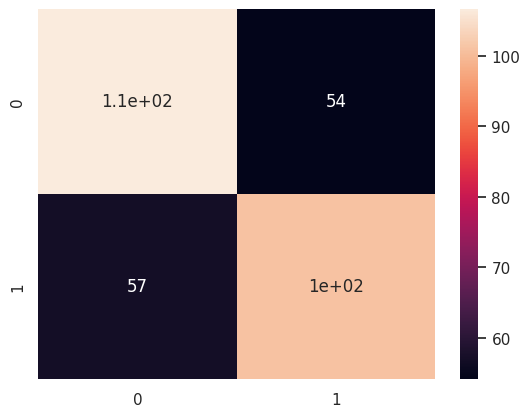

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)


print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True)


In [104]:
#對gbc使用GridSearchCV進行參數調整
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.025,0.05,0.075,0.1],
    'n_estimators': [200,210,220, 230,240,250,260,270,280,290,300],
    'max_depth': [3,4,5]

}

grid_dec = GridSearchCV(estimator=gbc,
                           param_grid=param_grid, verbose=1, scoring = "f1")
grid_dec.fit(X_train,y_train)
grid_dec_hrs = HalvingRandomSearchCV(estimator=gbc, param_distributions=param_grid, verbose=1,scoring ="f1")
grid_dec_hrs.fit(X_train,y_train)


Fitting 5 folds for each of 165 candidates, totalling 825 fits
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1273
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 63
n_resources: 20
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 1
n_candidates: 21
n_resources: 60
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 7
n_resources: 180
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 540
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingRandomSearchCV(estimator=GradientBoostingClassifier(),
                      param_distributions={'learning_rate': [0.01, 0.025, 0.05,
                                                             0.075, 0.1],
                                           'max_depth': [3, 4, 5],
                                           'n_estimators': [200, 210, 220, 230,
                                                            240, 250, 260, 270,
                                                            280, 290, 300]},
                      scoring='f1', verbose=1)

In [105]:
print(grid_dec.best_score_)
print(grid_dec.best_params_)
print(grid_dec.best_estimator_)
print('-----------------------')
print(grid_dec_hrs.best_score_)
print(grid_dec_hrs.best_params_)
print(grid_dec_hrs.best_estimator_)

0.6695800297301387
{'learning_rate': 0.075, 'max_depth': 5, 'n_estimators': 200}
GradientBoostingClassifier(learning_rate=0.075, max_depth=5, n_estimators=200)
-----------------------
0.6495164490120541
{'n_estimators': 260, 'max_depth': 4, 'learning_rate': 0.01}
GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=260)


In [107]:
grid_dec.best_estimator_.fit(X_train,y_train)
print(grid_dec.best_estimator_.score(X_test,y_test))
y_pred = grid_dec.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
grid_dec_hrs.best_estimator_.fit(X_train,y_train)
print(grid_dec_hrs.best_estimator_.score(X_test,y_test))
y_pred_hrs = grid_dec_hrs.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))

0.6206896551724138
[[104  57]
 [ 64  94]]
----------------
精確度： 0.6225165562913907
召回： 0.5949367088607594
F1 分數: 0.6084142394822006
0.670846394984326
[[104  57]
 [ 64  94]]
----------------
精確度： 0.6225165562913907
召回： 0.5949367088607594
F1 分數: 0.6084142394822006


In [108]:
pred_test_gbc = grid_dec.predict(df_test)
pred_test_gbc= pd.DataFrame(pred_test_gbc)
submit_gbc = df_test['PerNo']
submit_gbc = pd.DataFrame(submit_gbc)
submit_gbc = pd.concat([submit_gbc, pred_test_gbc], axis=1)
submit_gbc.columns = ['PerNo', 'PerStatus']
print(submit_gbc)
submit_gbc.to_csv('/content/submit_gbc_0827.csv', index=False)

      PerNo  PerStatus
0         1          1
1         3          0
2         7          1
3        15          0
4        16          0
...     ...        ...
3734   8761          0
3735   8765          0
3736   8767          0
3737   8774          0
3738   8775          0

[3739 rows x 2 columns]


# LightGBM

In [10]:
!pip install lightgbm

In [23]:


import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
# 創建成符合lgb特徵的數據集格式
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test,y_test, reference=lgb_train)

#訓練參數
params ={
    'task': 'train',
    'boosting_type': 'gbdt',#算法類型
    'learning_rate':0.05,
    'num_leaves':20,
    'max_depth':6,
    # 構建樹時的特徵選擇比例
    'feature_fraction':0.5,
    'feature_fraction_seed':8,
    'bagging_fraction':0.5,
    'bagging_freq': 5,
    'verbose':-1,
    'objective': 'binary',
    'metric':['rmse','auc'],#度量指標


}


[LightGBM] [Info] Number of positive: 638, number of negative: 635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 1273, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501178 -> initscore=0.004713
[LightGBM] [Info] Start training from score 0.004713
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.694001	valid_0's binary_logloss: 0.639201
[[ 96  65]
 [ 55 103]]
----------------
精確度： 0.6130952380952381
召回： 0.6518987341772152
F1 分數: 0.6319018404907977


<Axes: >

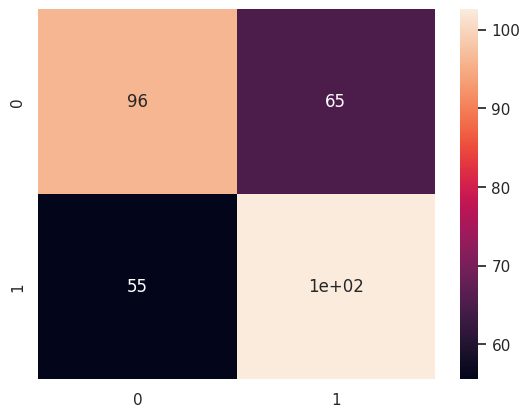

In [24]:
gbm = lgb.LGBMClassifier(num_leaves=31,learning_rate=0.05,n_estimators=20)
gbm_model = gbm.fit(X_train, y_train,eval_set=[(X_test,y_test)],eval_metric='auc',callbacks=[lgb.early_stopping(stopping_rounds=5)])
y_pred = gbm.predict(X_test,num_iteration=gbm_model.best_iteration_)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True)


In [17]:
from sklearn.model_selection import GridSearchCV
#調參數
params_grid = {
    'learning_rate':[0.05,0.1,0.15,0.2],
    'num_leaves': [30,32,34,37,40],
    'max_depth':[6, 8, 12, 16, 18, 20],
    'min_child_samples':[10,15,20]
}
gbm = lgb.LGBMClassifier(**params)
grid_dec = GridSearchCV(estimator=gbm,
                           param_grid=params_grid, verbose=1, scoring = "f1")
grid_dec.fit(X_train,y_train)
grid_dec_hrs = HalvingRandomSearchCV(estimator=gbm, param_distributions=params_grid, verbose=1,scoring ="f1")
grid_dec_hrs.fit(X_train,y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 20
max_resources_: 1273
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 63
n_resources: 20
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 1
n_candidates: 21
n_resources: 60
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 7
n_resources: 180
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 540
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingRandomSearchCV(estimator=LGBMClassifier(bagging_fraction=0.5,
                                               bagging_freq=5,
                                               feature_fraction=0.5,
                                               feature_fraction_seed=8,
                                               learning_rate=0.05, max_depth=6,
                                               metric=['rmse', 'auc'],
                                               num_leaves=20,
                                               objective='binary', task='train',
                                               verbose=-1),
                      param_distributions={'learning_rate': [0.05, 0.1, 0.15,
                                                             0.2],
                                           'max_depth': [6, 8, 12, 16, 18, 20],
                                           'min_child_samples': [10, 15, 20],
                                           'num_leaves': [30, 32, 34, 37, 40]},
                      scoring='f1', verbose=1)

In [18]:
print(grid_dec.best_score_)
print(grid_dec.best_params_)
print(grid_dec.best_estimator_)
print('-----------------------')
print(grid_dec_hrs.best_score_)
print(grid_dec_hrs.best_params_)
print(grid_dec_hrs.best_estimator_)

0.6519274071041263
{'learning_rate': 0.05, 'max_depth': 16, 'min_child_samples': 10, 'num_leaves': 40}
LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, feature_fraction=0.5,
               feature_fraction_seed=8, learning_rate=0.05, max_depth=16,
               metric=['rmse', 'auc'], min_child_samples=10, num_leaves=40,
               objective='binary', task='train', verbose=-1)
-----------------------
0.6248246366108605
{'num_leaves': 37, 'min_child_samples': 10, 'max_depth': 6, 'learning_rate': 0.15}
LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, feature_fraction=0.5,
               feature_fraction_seed=8, learning_rate=0.15, max_depth=6,
               metric=['rmse', 'auc'], min_child_samples=10, num_leaves=37,
               objective='binary', task='train', verbose=-1)


In [19]:
grid_dec.best_estimator_.fit(X_train,y_train)
print(grid_dec.best_estimator_.score(X_test,y_test))
y_pred = grid_dec.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))
grid_dec_hrs.best_estimator_.fit(X_train,y_train)
print(grid_dec_hrs.best_estimator_.score(X_test,y_test))
y_pred_hrs = grid_dec_hrs.predict(X_test)
print(confusion_matrix(y_test,y_pred, labels = [0,1]))
print('----------------')
print('精確度：',precision_score(y_test, y_pred))
print( '召回：',recall_score(y_test, y_pred))
print('F1 分數:',f1_score(y_test, y_pred))

0.6739811912225705
[[110  51]
 [ 53 105]]
----------------
精確度： 0.6730769230769231
召回： 0.6645569620253164
F1 分數: 0.6687898089171974
0.6269592476489029
[[110  51]
 [ 53 105]]
----------------
精確度： 0.6730769230769231
召回： 0.6645569620253164
F1 分數: 0.6687898089171974


In [21]:
pred_test_gbm = grid_dec.predict(df_test)
pred_test_gbm= pd.DataFrame(pred_test_gbm)
submit_gbm = df_test['PerNo']
submit_gbm = pd.DataFrame(submit_gbm)
submit_gbm = pd.concat([submit_gbm, pred_test_gbm], axis=1)
submit_gbm.columns = ['PerNo', 'PerStatus']
print(submit_gbm)

      PerNo  PerStatus
0         1          1
1         3          0
2         7          1
3        15          0
4        16          1
...     ...        ...
3734   8761          1
3735   8765          0
3736   8767          1
3737   8774          0
3738   8775          0

[3739 rows x 2 columns]


In [22]:
submit_gbm.to_csv('/content/submit_gbm_gsc_0827.csv', index=False)